In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import lzma,json

In [3]:
f=lzma.open("ep/ep_meps_current.json.xz")
#http://parltrack.euwiki.org/dumps/ep_meps_current.json.xz
members=json.loads(f.read())

In [4]:
f=lzma.open("ep/ep_votes.json.xz")
#http://parltrack.euwiki.org/dumps/ep_votes.json.xz
votes=json.loads(f.read())

In [23]:
countries=['Hungary','Romania']
eu={}
parties={}
groups={}
names={}
for j in members:
    z='Constituencies'
    w='Groups'    
    if z in j:
        if j[z][0]['country'] in countries:
            if j[z][0]['country'] not in eu:eu[j[z][0]['country']]={}
            eu[j[z][0]['country']][j['UserID']]=j
            names[j['Name']['full']]=j
            for i in j[z]:
                if type(i['party'])==str:
                    party=i['party']
                else:
                    party=i['party'][0]
                party=str(party)
                start=int(str(i['start'])[:4])
                end=int(str(i['end'])[:4])
                if end==9999:
                    end=2019
                if party not in parties:
                    parties[party]={'min':9999,'max':0}
                parties[party]['min']=min(start,parties[party]['min'])
                parties[party]['max']=max(end,parties[party]['max'])
            if w in j:
                for i in j[w]:
                    party=i['Organization']
                    party=str(party)
                    if type(i['groupid'])==str:
                        code=i['groupid']
                    else:
                        code=i['groupid'][0]
                    start=int(str(i['start'])[:4])
                    end=int(str(i['end'])[:4])
                    if end==9999:
                        end=2019
                    if party not in groups:
                        groups[party]={'min':9999,'max':0}
                    groups[party]['min']=min(start,groups[party]['min'])
                    groups[party]['max']=max(end,groups[party]['max'])
                    groups[party]['code']=code

In [6]:
groups

{"Group of the European People's Party (Christian Democrats)": {'min': 2009,
  'max': 2019,
  'code': 'PPE'},
 'Non-attached Members': {'min': 2005, 'max': 2019, 'code': 'NA'},
 "Group of the European People's Party (Christian Democrats) and European Democrats": {'min': 2003,
  'max': 2009,
  'code': 'PPE-DE'},
 'Group of the Alliance of Liberals and Democrats for Europe': {'min': 2004,
  'max': 2019,
  'code': 'ALDE'},
 'European Conservatives and Reformists Group': {'min': 2009,
  'max': 2019,
  'code': 'ECR'},
 'Group of the Progressive Alliance of Socialists and Democrats in the European Parliament': {'min': 2009,
  'max': 2019,
  'code': 'S&D'},
 'Socialist Group in the European Parliament': {'min': 2004,
  'max': 2009,
  'code': 'PSE'},
 'Group of the Party of European Socialists': {'min': 2003,
  'max': 2004,
  'code': 'PSE'},
 'Identity, Tradition and Sovereignty Group': {'min': 2007,
  'max': 2007,
  'code': 'ITS'},
 'Group of the European Liberal, Democrat and Reform Party': 

In [7]:
parties

{'Fidesz-Magyar Polgári Szövetség-Keresztény Demokrata Néppárt': {'min': 2009,
  'max': 2014},
 'Partidul Democrat-Liberal': {'min': 2008, 'max': 2015},
 'Partidul România Mare': {'min': 2007, 'max': 2014},
 'Partidul Democrat': {'min': 2007, 'max': 2008},
 'Fidesz-Magyar Polgári Szövetség': {'min': 2004, 'max': 2009},
 'Partidul Naţional Liberal': {'min': 2007, 'max': 2019},
 'Partidul Naţional Ţaranesc Creştin Democrat': {'min': 2014, 'max': 2014},
 'Modern Magyarország Mozgalom': {'min': 2013, 'max': 2014},
 'Magyar Demokrata Fórum': {'min': 2004, 'max': 2013},
 'Magyar Szocialista Párt': {'min': 2004, 'max': 2019},
 'Szabad Demokraták Szövetsége': {'min': 2004, 'max': 2009},
 'Partidul Social Democrat': {'min': 2007, 'max': 2019},
 'Jobbik Magyarországért Mozgalom': {'min': 2009, 'max': 2019},
 'Partidul Liberal Democrat': {'min': 2007, 'max': 2008},
 'Uniunea Democrată Maghiară din România': {'min': 2007, 'max': 2019},
 'Partidul Conservator': {'min': 2007, 'max': 2015},
 '-': {'m

In [65]:
def party_normalizer(party):
    if party in ['ALDE','ELDR']: return 'ALDE'
    elif party in ['ITS','ENF']: return 'ENF'
    elif party in ['NA','NI',['NA', 'NI']]: return 'N/A'
    elif party in ['PPE','PPE-DE']: return  'PPE'
    elif party in ['S&D','PSE']: return 'S&D'
    elif party in ['-','Independent']: return 'N/A'
    elif party in ['ALDE Romania','Partidul Conservator','Partidul Puterii Umaniste']: return 'ALDE RO'
    elif party in ['Demokratikus Koalíció']: return 'DK'
    elif party in ['Együtt 2014 - Párbeszéd Magyarországért']:return 'Együtt PM'
    elif party in ['Fidesz-Magyar Polgári Szövetség',
        'Fidesz-Magyar Polgári Szövetség-Keresztény Demokrata Néppárt',
        'Fidesz-Magyar Polgári Szövetség-Kereszténydemokrata Néppárt',
        'Kereszténydemokrata Néppárt']:return 'FIDESZ-KDNP'
    elif party in ['Forumul Democrat al Germanitor din România']: return 'FDGR'
    elif party in ['Jobbik Magyarországért Mozgalom']:return 'Jobbik'
    elif party in ['Lehet Más A Politika']:return 'LMP'
    elif party in ['Magyar Demokrata Fórum','Modern Magyarország Mozgalom',
                'Szabad Demokraták Szövetsége']: return 'Egyéb'
    elif party in ['Magyar Szocialista Párt']: return 'MSZP'
    elif party in ['Partidul Democrat','Partidul Democrat-Liberal','Partidul Naţional Liberal',
        'Partidul Liberal Democrat','PNL']: return'PNL'
    elif party in ['Partidul Mișcarea Populară']: return 'PMP'
    elif party in ['Partidul Naţional Ţaranesc Creştin Democrat']:return 'PNȚCD'
    elif party in ['Partidul România Mare']:return 'PRM'
    elif party in ['Partidul Social Democrat','Partidul Social Democrat + Partidul Conservator']:return 'PSD'
    elif party in ['Romániai Magyar Demokrata Szövetség',
        'Uniunea Democrată Maghiară din România']:return 'UDMR'
    elif party in ['Uniunea Națională pentru Progresul României']: return 'UNPR'
    else: return party

In [9]:
def get_allegiance(allegiance,voteid,outcome,name):
    if voteid not in allegiance:
        allegiance[voteid]={'title':j['title'],'url':j['url'],'ts':j['ts']}
    if outcome not in allegiance[voteid]:
        allegiance[voteid][outcome]=[]
    allegiance[voteid][outcome].append(name)
    return allegiance

In [10]:
eu_allegiance={}
eu_vt={}
for country in countries:
    hu=eu[country]
    hu_allegiance={}
    hu_vt={}
    for j in votes:
        ts=j['ts']
        year=str(ts)[:4]
        if year not in hu_vt:hu_vt[year]=[]
        if year not in hu_allegiance:hu_allegiance[year]={'name':{},'group':{},'party':{}}    
        if j['title'] not in ["Modification de l'ordre du jour"]:
            for outcome in ['For','Against']:
                if outcome in j:
                    for group in j[outcome]['groups']:
                        for i in group['votes']:
                            if i['ep_id'] in hu:
                                dummy={}
                                dummy['vote']=j['voteid']
                                dummy['party']='-'
                                for k in hu[i['ep_id']]['Constituencies']:
                                    if k['start']<ts<k['end']:
                                        dummy['party']=k['party']
                                dummy['name']=hu[i['ep_id']]['Name']['full']
                                dummy['outcome']=outcome
                                dummy['group']=group['group']
                                dummy['party']=party_normalizer(dummy['party'])
                                dummy['group']=party_normalizer(dummy['group'])
                                dummy['title']=j['title']
                                dummy['url']=j['url']
                                dummy['ts']=ts
                                dummy['year']=year
                                hu_vt[year].append(dummy)
                                for allegiance_type in ['name','group','party']:
                                    hu_allegiance[year][allegiance_type]=\
                                        get_allegiance(hu_allegiance[year][allegiance_type],j['voteid'],
                                                   outcome,dummy[allegiance_type])
    eu_allegiance[country]=hu_allegiance
    eu_vt[country]=hu_vt
    print(country)

Hungary
Romania


Allegiance

In [11]:
def get_allegiance_matrix(key,vt,allegiance):
    allegiance_matrix={}
    initvote={'Same':0,'Opposite':0,'Total':0}
    for j1 in vt:
        outcome=j1['outcome']
        name1=j1[key]
        if name1 not in allegiance_matrix:allegiance_matrix[name1]={}
        if outcome=='For':
            for name2 in allegiance[j1['vote']]['For']:
                if name2 not in allegiance_matrix[name1]:
                    allegiance_matrix[name1][name2]=dict(initvote)
                allegiance_matrix[name1][name2]['Total']+=1
                allegiance_matrix[name1][name2]['Same']+=1
            if 'Against' in allegiance[j1['vote']]:
                for name2 in allegiance[j1['vote']]['Against']:
                    if name2 not in allegiance_matrix[name1]:
                        allegiance_matrix[name1][name2]=dict(initvote)
                    allegiance_matrix[name1][name2]['Total']+=1
                    allegiance_matrix[name1][name2]['Opposite']+=1
        elif outcome=='Against':
            for name2 in allegiance[j1['vote']]['Against']:
                if name2 not in allegiance_matrix[name1]:
                    allegiance_matrix[name1][name2]=dict(initvote)
                allegiance_matrix[name1][name2]['Total']+=1
                allegiance_matrix[name1][name2]['Same']+=1
            if 'For' in allegiance[j1['vote']]:
                for name2 in allegiance[j1['vote']]['For']:
                    if name2 not in allegiance_matrix[name1]:
                        allegiance_matrix[name1][name2]=dict(initvote)
                    allegiance_matrix[name1][name2]['Total']+=1
                    allegiance_matrix[name1][name2]['Opposite']+=1
    for j in allegiance_matrix:
        for i in allegiance_matrix[j]:
            allegiance_matrix[j][i]['Same_perc']=np.round(allegiance_matrix[j][i]['Same']/allegiance_matrix[j][i]['Total'],3)
            allegiance_matrix[j][i]['Opposite_perc']=np.round(allegiance_matrix[j][i]['Opposite']/allegiance_matrix[j][i]['Total'],3)
    return allegiance_matrix

In [12]:
eu_allegiance_matrix={}
for country in countries:
    for year in sorted(eu_vt[country]):
        for allegiance_type1 in ['name','group','party']:
            for allegiance_type2 in ['name','group','party']:
                dummy=get_allegiance_matrix(allegiance_type1,eu_vt[country][year],
                        eu_allegiance[country][year][allegiance_type2])
                if dummy!={}:
                    if country not in eu_allegiance_matrix:eu_allegiance_matrix[country]={}
                    if year not in eu_allegiance_matrix[country]:eu_allegiance_matrix[country][year]={}
                    if allegiance_type1 not in eu_allegiance_matrix[country][year]:
                        eu_allegiance_matrix[country][year][allegiance_type1]={}
                    if allegiance_type2 not in eu_allegiance_matrix[country][year][allegiance_type1]:
                        eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2]={}
                    eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2]=dummy

        print(country,year)

Hungary 2004
Hungary 2005
Hungary 2006
Hungary 2007
Hungary 2008
Hungary 2009
Hungary 2010
Hungary 2011
Hungary 2012
Hungary 2013
Hungary 2014
Hungary 2015
Hungary 2016
Hungary 2017
Hungary 2018
Hungary 2019
Romania 2004
Romania 2005
Romania 2006
Romania 2007
Romania 2008
Romania 2009
Romania 2010
Romania 2011
Romania 2012
Romania 2013
Romania 2014
Romania 2015
Romania 2016
Romania 2017
Romania 2018
Romania 2019


In [13]:
open('ep/export/json/eu_allegiance_matrix.json','w').write(json.dumps(eu_allegiance_matrix))

4879278

Listify dictionary

In [14]:
eu_allegiance_list=[]
for country in sorted(eu_allegiance_matrix):
    for year in sorted(eu_allegiance_matrix[country]):
        for allegiance_type1 in sorted(eu_allegiance_matrix[country][year]):
            for allegiance_type2 in sorted(eu_allegiance_matrix[country][year][allegiance_type1]):
                for name1 in sorted(eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2]):
                    for name2 in sorted(eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2][name1]):
                        dummy={'country':country,
                                'year':year,
                                'allegiance_type1':allegiance_type1,
                                'allegiance_type2':allegiance_type2,
                                'name1':name1,
                                'name2':name2}
                        for key in sorted(eu_allegiance_matrix[country][year][allegiance_type1][allegiance_type2][name1][name2]):
                            dummy[key]=eu_allegiance_matrix[country][year]\
                                [allegiance_type1][allegiance_type2][name1][name2][key]
                        eu_allegiance_list.append(dummy)

In [15]:
open('ep/export/json/eu_allegiance_list.json','w').write(json.dumps(eu_allegiance_list))

10592699

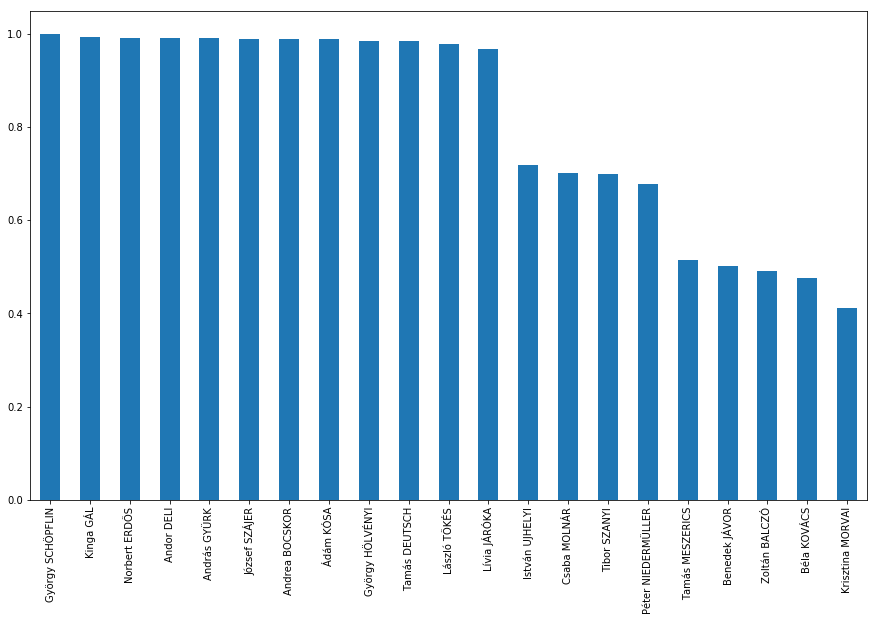

In [16]:
(pd.DataFrame(eu_allegiance_matrix['Hungary']['2018']['name']['name']['György SCHÖPFLIN']).\
         T['Same_perc']-0).sort_values(ascending=False).plot(kind='bar',figsize=(15,9))

Clusterings

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage  
import numpy as np

In [49]:
def dict_2_matrix(matrix,key,party_labels=False):
    labels=sorted(matrix)
    slabels=[]
    for i in range(len(labels)):
        label=labels[i]
        if label in names:
            if party_labels:
                party=party_normalizer(names[label]['Constituencies'][0]['party'])
                group=party_normalizer(names[label]['Groups'][0]['groupid'])
                slabels.append(str(label)+' | '+str(party)+' | '+str(group))
            else:
                slabels.append(label)
        else:
            slabels.append(label)

    #extend to square matrix
    inner_keys=matrix[sorted(matrix)[0]]
    inner_keys=sorted(inner_keys[sorted(inner_keys)[0]])
    for name1 in  labels:
        for name2 in labels:
            if name2 not in matrix[name1]:
                matrix[name1][name2]={i:0 for i in inner_keys}
    return np.array([[matrix[name1][name2][key] for name2 in sorted(matrix[name1])] for name1 in labels]),slabels

In [94]:
def dendro(matrix,th=1000,key='Same_perc',party_labels=False):
    X,labelList=dict_2_matrix(matrix,key,party_labels)
    linked = linkage(X, 'ward')
    plt.figure(figsize=(14, 7))  
    dendrogram(linked,  
                orientation='right',
                labels=labelList,
                p=4,
                #truncate_mode='lastp',
                #show_contracted=True,
                color_threshold=th,
                distance_sort='descending',
                show_leaf_counts=True)
    ax=plt.gca()
    plt.setp(ax.get_xticklabels(), rotation=90, fontsize=9)
    plt.show()  

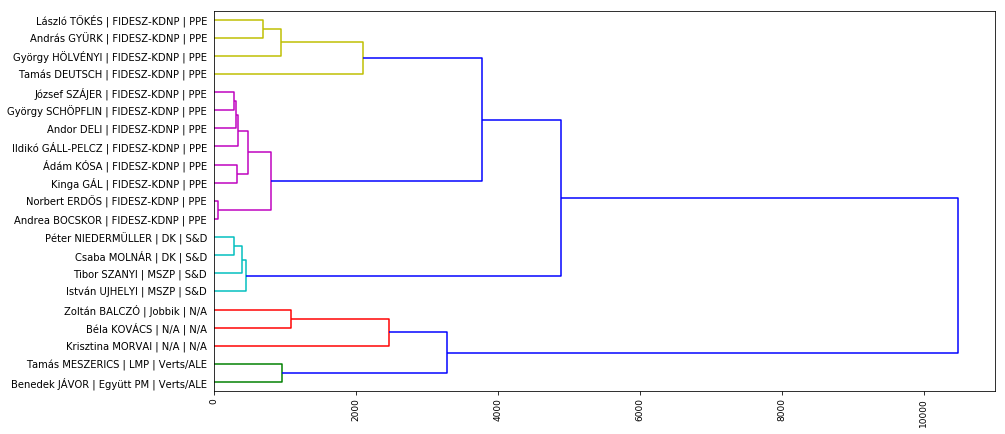

In [96]:
dendro(eu_allegiance_matrix['Hungary']['2016']['name']['name'],3000,'Same',True)

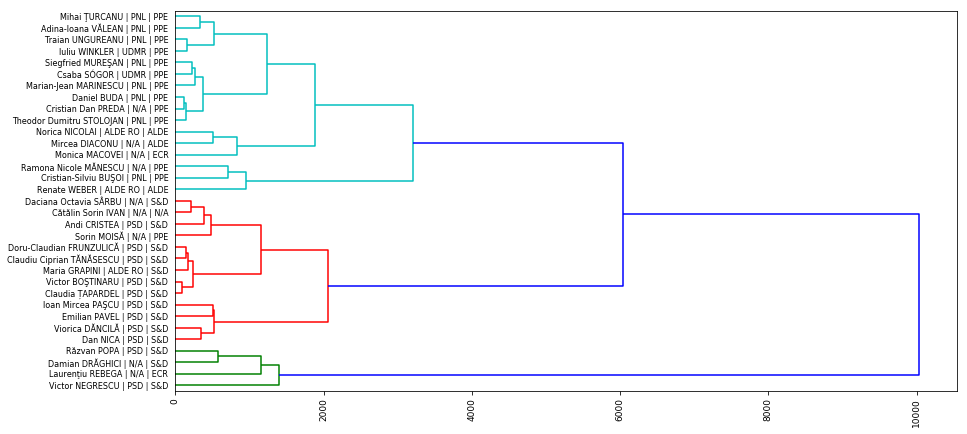

In [102]:
dendro(eu_allegiance_matrix['Romania']['2017']['name']['name'],5000,'Same',True)

Matrix to chord

In [293]:
from scipy import sparse

In [315]:
def matrix_2_chord(matrix,labels):
    row, col = np.where(matrix)
    coo = np.rec.fromarrays([row, col, matrix[row, col]], names='row col value'.split())
    coo = coo.tolist()
    coo_labeled=[[labels[i[0]],labels[i[1]],i[2]] for i in coo if labels[i[0]]!=labels[i[1]]]
    df=pd.DataFrame(coo_labeled)
    return df

In [ ]:
dfs=[]
for country in countries:
    for year in sorted(eu_allegiance_matrix[country]):
        for name1 in sorted(eu_allegiance_matrix[country][year]):
            for name2 in sorted(eu_allegiance_matrix[country][year][name1]):
                try:
                    matrix,labels=dict_2_matrix(eu_allegiance_matrix[country][year][name1][name2],'Same')
                    df=matrix_2_chord(matrix,labels)
                    df['zscore'] = (df[2] - df[2].mean())/df[2].std(ddof=0)
                    df['minmax']=(df[2] - df[2].min()) / (df[2].max() - df[2].min())
                    df=df[df['minmax']>0]
                    df['country']=country
                    df['year']=year
                    df['name1']=name1
                    df['name2']=name2
                    dfs.append(df)
                except: pass
        print(country,year)

Hungary 2004
Hungary 2005
Hungary 2006


In [312]:
dfs=pd.concat(dfs)
dfs.to_excel('ep/export/pandas/eu_allegiance_matrix.xlsx')

In [313]:
dfs

,0,1,2,zscore,minmax,country,year,name1,name2
0,ALDE,PPE,0.736154,0.415976,0.766523,Hungary,2004,group,group
1,ALDE,S&D,0.777525,0.962577,1.000000,Hungary,2004,group,group
2,PPE,ALDE,0.736154,0.415976,0.766523,Hungary,2004,group,group
4,S&D,ALDE,0.777525,0.962577,1.000000,Hungary,2004,group,group
0,Alexandra DOBOLYI,Péter OLAJOS,0.626078,-1.006670,0.280315,Hungary,2004,name,group
1,Alexandra DOBOLYI,Zsolt László BECSEY,0.979062,1.290493,0.968593,Hungary,2004,name,group
2,András GYÜRK,Alexandra DOBOLYI,0.746341,-0.224015,0.514815,Hungary,2004,name,group
3,András GYÜRK,Péter OLAJOS,0.970209,1.232879,0.951331,Hungary,2004,name,group
4,András GYÜRK,Zsolt László BECSEY,0.620233,-1.044706,0.268919,Hungary,2004,name,group
5,Béla GLATTFELDER,Alexandra DOBOLYI,0.720000,-0.395441,0.463452,Hungary,2004,name,group
